In [10]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
# Function to extract hyperparameters and accuracy from a block
def extract_info(block):
    # Remove the first line (header)
    block_lines = block.strip().split('\n')[1:]

    # Define the pattern for extracting hyperparameters
    pattern = r"(\w+):\s+(\S+)"
    matches = re.findall(pattern, '\n'.join(block_lines))

    # Extract accuracy for the mask
    accuracy_pattern = r"Accuracy for the mask: (\S+)"
    accuracy_mask = re.search(accuracy_pattern, block).group(1)

    hyperparameters = tuple(value for key, value in matches if key != 'sequence' and key != 'mask')

    return hyperparameters, float(accuracy_mask)

In [3]:
# Read the file
file_path = './ml/BERT/hyperparameters_combinations'
with open(file_path, 'r') as file:
    content = file.read()

# Split the content into blocks
blocks = re.split(r"\n\n", content)

In [4]:
combinations = []
accuracies = []
for block in blocks:
    if "Hyperparameters combinations:" in block:
        hyperparameters, accuracy_mask = extract_info(block)
        combinations.append(hyperparameters)
        accuracies.append(accuracy_mask)

In [5]:
best_combination = combinations[np.argmax(accuracies)]
print("Best combination:", best_combination, "with accuracy:", np.max(accuracies))

Best combination: ('32', '2', '32', '1', '0.01', '100') with accuracy: 0.4968499686666731


In [6]:
best_5_combinations = np.argsort(accuracies)[-5:][::-1]
print("5 best combinations:")
for i in best_5_combinations:
    print(combinations[i], "with accuracy:", accuracies[i])

5 best combinations:
('32', '2', '32', '1', '0.01', '100') with accuracy: 0.4968499686666731
('32', '2', '32', '1', '0.01', '50') with accuracy: 0.4678021735578361
('32', '2', '128', '1', '0.01', '100') with accuracy: 0.4544552429435231
('32', '2', '128', '1', '0.01', '50') with accuracy: 0.43934982882139195
('32', '2', '256', '1', '0.01', '100') with accuracy: 0.4355149466200393


In [7]:
worst_5_combinations = np.argsort(accuracies)[:5]
print("5 worst combinations:")
for i in worst_5_combinations:
    print(combinations[i], "with accuracy:", accuracies[i])

5 worst combinations:
('32', '4', '32', '1', '0.0001', '10') with accuracy: 0.09693371390482537
('32', '2', '32', '1', '0.0001', '10') with accuracy: 0.10512123894553611
('32', '8', '32', '1', '0.0001', '10') with accuracy: 0.10575870403953769
('32', '2', '128', '1', '0.0001', '10') with accuracy: 0.11945416106513644
('32', '8', '128', '1', '0.0001', '10') with accuracy: 0.12726312848075633


In [8]:
worst_30th_combination = combinations[np.argsort(accuracies)[30]]
print("30th worst combination:", worst_30th_combination, "with accuracy:", accuracies[np.argsort(accuracies)[30]])

30th worst combination: ('256', '2', '32', '1', '0.0001', '10') with accuracy: 0.18216719148868246


In [9]:
num_layers = [1, 2, 4]
num_layers_acc = [
    [0.46840090913127896, 0.4679711565739435, 0.4727783701086777],
    [0.45499672990038054, 0.47693807029272606, 0.4660739212530549],
    [0.33773916163821266, 0.29767304368433656, 0.4215807928418293]
]
num_layers_time = [
    [340.73820189283418, 339.5549817085266, 345.92688155174255],
    [691.27164738291876, 684.6538832187653, 711.3281812667847],
    [1581.7362518461218, 1520.5050327777863, 1716.738266468048]
]

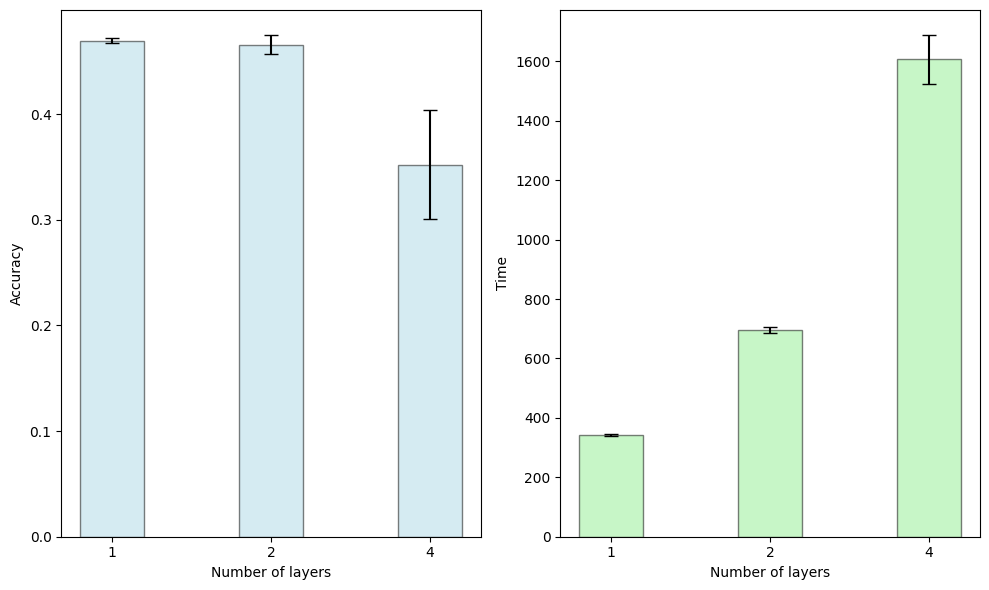

In [33]:
mean_acc = np.mean(num_layers_acc, axis=1)
std_acc = np.std(num_layers_acc, axis=1)

mean_time = np.mean(num_layers_time, axis=1)
std_time = np.std(num_layers_time, axis=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].bar(np.arange(len(num_layers)), mean_acc, yerr=std_acc, width=0.4, alpha=0.5, color='lightblue', edgecolor='black', capsize=5, label='Accuracy')
ax[1].bar(np.arange(len(num_layers)), mean_time, yerr=std_time, width=0.4, alpha=0.5, color='lightgreen', edgecolor='black', capsize=5, label='Time')

ax[0].set_xlabel('Number of layers')
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(np.arange(len(num_layers)), num_layers)

ax[1].set_xlabel('Number of layers')
ax[1].set_ylabel('Time')
ax[1].set_xticks(np.arange(len(num_layers)), num_layers)

plt.tight_layout()
plt.savefig('Num_layers.png')
plt.show()